# EDA for Avril's Datasets

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import cvxpy as cp

## All Movies (on Rotten Tomatoes) Dataset

In [ ]:
#import csv files
url_allmovie = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/all_movie.csv'
df_allmovie_raw = pd.read_csv(url_allmovie)

#create dataframes with the relevant columns
df_allmovie = df_allmovie_raw[['Title','Year','Cast 1', 'Cast 2', 'Cast 3', 'Cast 4', 'Cast 5', 'Director 1', 'Genre', 'Rating','Runtime']]


#explore the allmovie dataset
df_allmovie.dtypes

Title         object
Year           int64
Cast 1        object
Cast 2        object
Cast 3        object
Cast 4        object
Cast 5        object
Director 1    object
Genre         object
Rating        object
Runtime       object
dtype: object

In [ ]:
df_allmovie.shape

(29810, 11)

In [ ]:
#check for null values
print('Before - Null Values in Each Column:\n',df_allmovie.isnull().sum()) 
print(df_allmovie.shape )

#drop the rows where genre is null
df_allmovie_null = df_allmovie.isnull()
df_allmovie = df_allmovie[df_allmovie_null['Genre'] == False]

#now we see there are no more null values
print("After - Null Values in Each Column:\n",df_allmovie.isnull().sum())

print(df_allmovie.shape)

Before - Null Values in Each Column:
 Title           0
Year            0
Cast 1          0
Cast 2          0
Cast 3          0
Cast 4          0
Cast 5          0
Director 1      0
Genre         526
Rating          0
Runtime         0
dtype: int64
(29810, 11)
After - Null Values in Each Column:
 Title         0
Year          0
Cast 1        0
Cast 2        0
Cast 3        0
Cast 4        0
Cast 5        0
Director 1    0
Genre         0
Rating        0
Runtime       0
dtype: int64
(29284, 11)


In [ ]:
#Check for string entries for Director Not Available
df_allmovie.loc[df_allmovie['Director 1'] == "Director Not Available"].count()

#Check for string entries for Cast Not Available
df_allmovie.loc[df_allmovie['Cast 1'] == "Cast Not Available"].count()


Title         344
Year          344
Cast 1        344
Cast 2        344
Cast 3        344
Cast 4        344
Cast 5        344
Director 1    344
Genre         344
Rating        344
Runtime       344
dtype: int64

In [ ]:
#this csv is like url_allmovie but contains extra columns made in excel that keep track of unavailable directors and cast, with indicators to delete certain rows
#If 3 or more cast are unavailable or if director is unavailable,the row_delete column will contain 1. (we delete that row)
url_rowdelete = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/all_movie_EDA.csv'
df_rowdelete  = pd.read_csv(url_rowdelete)

#delete the same rows will null genre here too to match the length of df_allmovie
df_rowdelete = df_rowdelete[df_allmovie_null['Genre'] == False]
df_rowdelete.head()

     

,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6,Description,Director 1,Genre,Rating,Release Date,Runtime,Studio,Title,Year,Cast 1.1,Cast2,cast3,cast4,cast5,cast6,Sum_num_unknown,Cast_delete,Director_delete,Row_delete
0,Brendan Fraser,John Hannah,Maria Bello,Michelle Yeoh,Jet Li,Russell Wong,The Fast and the Furious director Rob Cohen co...,Rob Cohen,Action,PG-13,7/24/2008,112 minutes,Universal Pictures,The Mummy: Tomb of the Dragon Emperor,2008,0,0,0,0,0,0,0,0,0,0
1,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Roddy Piper,T.J. McGibbon,James Preston Rogers,The journey of a professional wrestler who bec...,Warren P. Sonoda,Action,PG-13,1/8/2016,111 minutes,Freestyle Releasing,The Masked Saint,2016,0,0,0,0,0,0,0,0,0,0
2,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Marcia Gay Harden,John Ales,Barry Bostwick,"Dead pan Leslie Nielsen stars as Dick Steele, ...",Rick Friedberg,Action,PG-13,5/24/1996,80 minutes,Hollywood Pictures,Spy Hard,1996,0,0,0,0,0,0,0,0,0,0
3,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Bruno Ganz,Nadja Uhl,Jan Josef Liefers,Director Uli Edel teams with screenwriter Bern...,Uli Edel,Action,R,9/25/2008,149 minutes,Vitagraph Films,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,0,0,0,0,0,0,0,0,0,0
4,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,Sam Bottoms,Laurence Fishburne,One of a cluster of late-1970s films about the...,Francis Ford Coppola,Action,R,1/1/1979,153 minutes,United Artists,Apocalypse Now,1979,0,0,0,0,0,0,0,0,0,0


In [ ]:
#delete rows where indicated
df_allmovie = df_allmovie.drop(df_rowdelete[df_rowdelete['Row_delete']== 1].index)

#check for Cast Unavailable again
print('Cast 1 Unavailable:', df_allmovie.loc[df_allmovie['Cast 1'] == "Cast Not Available"].count().sum())
print('Cast 2 Unavailable:', df_allmovie.loc[df_allmovie['Cast 2'] == "Cast Not Available"].count().sum())
print('Cast 3 Unavailable:', df_allmovie.loc[df_allmovie['Cast 3'] == "Cast Not Available"].count().sum())
print('Cast 4 Unavailable:', df_allmovie.loc[df_allmovie['Cast 4'] == "Cast Not Available"].count().sum())
print('Cast 5 Unavailable:', df_allmovie.loc[df_allmovie['Cast 5'] == "Cast Not Available"].count().sum())

Cast 1 Unavailable: 0
Cast 2 Unavailable: 0
Cast 3 Unavailable: 0
Cast 4 Unavailable: 2541
Cast 5 Unavailable: 6182


In [ ]:
#theres a significant amount of missing values in Cast 4 and Cast 5 column, lets drop those
df_allmovie = df_allmovie.drop(columns= {'Cast 4', 'Cast 5'})
df_allmovie.head()

,Title,Year,Cast 1,Cast 2,Cast 3,Director 1,Genre,Rating,Runtime
0,The Mummy: Tomb of the Dragon Emperor,2008,Brendan Fraser,John Hannah,Maria Bello,Rob Cohen,Action,PG-13,112 minutes
1,The Masked Saint,2016,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Warren P. Sonoda,Action,PG-13,111 minutes
2,Spy Hard,1996,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Rick Friedberg,Action,PG-13,80 minutes
3,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Uli Edel,Action,R,149 minutes
4,Apocalypse Now,1979,Martin Sheen,Marlon Brando,Robert Duvall,Francis Ford Coppola,Action,R,153 minutes


In [ ]:
#strip any leading or trailing spaces to clean our string columns
df_allmovie['Title'] = df_allmovie['Title'].str.strip()
df_allmovie['Cast 1'] = df_allmovie['Cast 1'].str.strip()
df_allmovie['Cast 2'] = df_allmovie['Cast 2'].str.strip()
df_allmovie['Cast 3'] = df_allmovie['Cast 3'].str.strip()
df_allmovie['Director 1'] = df_allmovie['Director 1'].str.strip()
df_allmovie['Genre'] = df_allmovie['Genre'].str.strip()
df_allmovie['Rating'] = df_allmovie['Rating'].str.strip()

In [ ]:
#get rid of movies with Runtime Not Available
df_allmovie = df_allmovie.drop(df_allmovie[df_allmovie['Runtime'] == "Runtime Not Available"].index)
print(df_allmovie.shape)

#turn Runtime into an int column by removing "minutes"
df_allmovie['Runtime'] = df_allmovie['Runtime'].str.replace(r'\D', '').astype(int)
df_allmovie.head()

(28290, 9)


,Title,Year,Cast 1,Cast 2,Cast 3,Director 1,Genre,Rating,Runtime
0,The Mummy: Tomb of the Dragon Emperor,2008,Brendan Fraser,John Hannah,Maria Bello,Rob Cohen,Action,PG-13,112
1,The Masked Saint,2016,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Warren P. Sonoda,Action,PG-13,111
2,Spy Hard,1996,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Rick Friedberg,Action,PG-13,80
3,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Uli Edel,Action,R,149
4,Apocalypse Now,1979,Martin Sheen,Marlon Brando,Robert Duvall,Francis Ford Coppola,Action,R,153


In [ ]:
#see all the different genres
df_allmovie.groupby('Genre').size()


Genre
Action         3058
Art&Foreign    2193
Classics       1502
Comedy         3681
Documentary    1303
Drama          7671
Horror         1666
Kids&Family     957
Mystery        3000
Romance        1688
SciFi          1571
dtype: int64

In [ ]:
#make genre into a category
df_allmovie.loc[:,'Genre'] = df_allmovie.Genre.astype('category') 
df_allmovie = pd.get_dummies(df_allmovie, columns=['Genre'], dtype = int)


In [ ]:
#this dataset has duplicate movies listed under different genres
genres = pd.concat([df_allmovie.iloc[:,0],df_allmovie.iloc[:,8:]],axis = 1)
#sum the genres to see all the genres of one movie in a single row
genres = genres.groupby('Title').sum()
genres.reset_index(inplace=True)
genres.head()

#remove genre columns for df_allmovie (we will add them back later)
df_allmovie = df_allmovie.drop(columns = {'Genre_Action', 'Genre_Art&Foreign', 'Genre_Classics',
       'Genre_Comedy', 'Genre_Documentary', 'Genre_Drama', 'Genre_Horror',
       'Genre_Kids&Family', 'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi'})

#drop movie duplicates, then merge the genre row with the movie title again
df_allmovie = df_allmovie.drop_duplicates(subset='Title').reset_index(drop=True)
df_allmovie = pd.merge(df_allmovie,genres,how='inner', on=['Title'])

#now each movie will be listed in only one row, with 1 or more genres indicated
df_allmovie



,Title,Year,Cast 1,Cast 2,Cast 3,Director 1,Rating,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi
0,The Mummy: Tomb of the Dragon Emperor,2008,Brendan Fraser,John Hannah,Maria Bello,Rob Cohen,PG-13,112,1,0,0,1,0,1,0,0,0,0,0
1,The Masked Saint,2016,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Warren P. Sonoda,PG-13,111,1,0,0,0,0,0,0,0,0,0,0
2,Spy Hard,1996,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Rick Friedberg,PG-13,80,1,0,0,1,0,0,0,0,0,0,0
3,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Uli Edel,R,149,1,1,0,0,0,1,0,0,0,0,0
4,Apocalypse Now,1979,Martin Sheen,Marlon Brando,Robert Duvall,Francis Ford Coppola,R,153,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047,Meet Dave,2008,Eddie Murphy,Elizabeth Banks,Scott Caan,Brian Robbins,PG,90,0,0,0,0,0,0,0,0,0,0,1
14048,"Oh, God!",1977,George Burns,John Denver,Teri Garr,Carl Reiner,PG,98,0,0,0,0,0,0,0,0,0,0,1
14049,Lazer Team,2016,Alan Ritchson,Colton Dunn,Gavin Free,Matt Hullum,PG-13,102,0,0,0,0,0,0,0,0,0,0,1
14050,Starship Troopers 2: Hero of the Federation,2004,Richard Burgi,Colleen Porch,Billy Brown,Phil Tippett,R,92,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#see all the ratings types we have
df_allmovie.groupby('Rating').size()


Rating
G         564
NC17       37
NR       3654
PG       1841
PG-13    2536
R        5420
dtype: int64

In [ ]:
#make rating into a category
df_allmovie.loc[:,'Rating'] = df_allmovie.Rating.astype('category') 
df_allmovie = pd.get_dummies(df_allmovie, columns=['Rating'], dtype=int)
df_allmovie.head()

,Title,Year,Cast 1,Cast 2,Cast 3,Director 1,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R
0,The Mummy: Tomb of the Dragon Emperor,2008,Brendan Fraser,John Hannah,Maria Bello,Rob Cohen,112,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,The Masked Saint,2016,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Warren P. Sonoda,111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Spy Hard,1996,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Rick Friedberg,80,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Uli Edel,149,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,Apocalypse Now,1979,Martin Sheen,Marlon Brando,Robert Duvall,Francis Ford Coppola,153,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#rename columns
df_allmovie = df_allmovie.rename(columns={'Director 1':'director_name'})

#after all these changes, here is the column types and shape 
print(df_allmovie.dtypes)
print(df_allmovie.shape)
df_allmovie.head()

Title                object
Year                  int64
Cast 1               object
Cast 2               object
Cast 3               object
director_name        object
Runtime               int64
Genre_Action          int64
Genre_Art&Foreign     int64
Genre_Classics        int64
Genre_Comedy          int64
Genre_Documentary     int64
Genre_Drama           int64
Genre_Horror          int64
Genre_Kids&Family     int64
Genre_Mystery         int64
Genre_Romance         int64
Genre_SciFi           int64
Rating_G              int64
Rating_NC17           int64
Rating_NR             int64
Rating_PG             int64
Rating_PG-13          int64
Rating_R              int64
dtype: object
(14052, 24)


,Title,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R
0,The Mummy: Tomb of the Dragon Emperor,2008,Brendan Fraser,John Hannah,Maria Bello,Rob Cohen,112,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,The Masked Saint,2016,Brett Granstaff,Diahann Carroll,Lara Jean Chorostecki,Warren P. Sonoda,111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Spy Hard,1996,Leslie Nielsen,Nicollette Sheridan,Andy Griffith,Rick Friedberg,80,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Der Baader Meinhof Komplex (The Baader Meinhof...,2008,Martina Gedeck,Moritz Bleibtreu,Johanna Wokalek,Uli Edel,149,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,Apocalypse Now,1979,Martin Sheen,Marlon Brando,Robert Duvall,Francis Ford Coppola,153,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Director Awards Dataset

In [ ]:
#import csv files
url_diraward = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/900_acclaimed_directors_awards.csv'
df_diraward_raw = pd.read_csv(url_diraward,sep = ';')

#create dataframes with the relevant columns
df_diraward = df_diraward_raw[['name', 'Total awards']]

#explore the df_dirawards dataframe
print(df_diraward.dtypes)
print(df_diraward.shape)
df_diraward.head()


name            object
Total awards     int64
dtype: object
(893, 2)


,name,Total awards
0,Ingmar Bergman,101
1,Marlon Brando,58
2,Federico Fellini,90
3,Alfred Hitchcock,53
4,Buster Keaton,5


In [ ]:
#check for null
df_diraward.isnull().sum()

name            0
Total awards    0
dtype: int64

In [ ]:
#check if each director is unique (should be 893)
df_diraward.groupby('name').size()

name
Abdellatif Kechiche    1
Abel Gance             1
Adam McKay             1
Adrian Lyne            1
Agnieszka Holland      1
                      ..
Yôjirô Takita          1
Zack Snyder            1
Zhangke Jia            1
Zoltan Korda           1
jaume balaguero        1
Length: 893, dtype: int64

In [ ]:
#rename the columns for clarity
df_diraward = df_diraward.rename(columns={'name':'director_name', 'Total awards': 'director_awards'})

#strip any leading or trailing spaces
df_diraward['director_name'] = df_diraward['director_name'].str.strip()

df_diraward.head()

,director_name,director_awards
0,Ingmar Bergman,101
1,Marlon Brando,58
2,Federico Fellini,90
3,Alfred Hitchcock,53
4,Buster Keaton,5


# **EDA for Eric's Datasets**

In [ ]:
#import csv
url_imdb = 'https://raw.githubusercontent.com/llucifer97/imbd-analysis/master/imbd.csv'
df_imdb_raw = pd.read_csv(url_imdb)


#This contians likes on facebook for direction, actor, movie
df_imdb_raw.head()

#create dataframe with relevant columns
df_imdb = df_imdb_raw.drop(['color','gross','genres','num_voted_users','facenumber_in_poster','plot_keywords','movie_imdb_link','budget','aspect_ratio','language','country','content_rating','title_year','imdb_score'],axis = 1)
df_imdb.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,CCH Pounder,Avatar,4834,Wes Studi,3054.0,936.0,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Johnny Depp,Pirates of the Caribbean: At World's End,48350,Jack Davenport,1238.0,5000.0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Christoph Waltz,Spectre,11700,Stephanie Sigman,994.0,393.0,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Tom Hardy,The Dark Knight Rises,106759,Joseph Gordon-Levitt,2701.0,23000.0,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,143,NaN,NaN,12.0,0


In [ ]:
df_imdb.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
actor_1_name                  object
movie_title                   object
cast_total_facebook_likes      int64
actor_3_name                  object
num_user_for_reviews         float64
actor_2_facebook_likes       float64
movie_facebook_likes           int64
dtype: object

In [ ]:
# FB likes for director
df_dir_FB_likes = df_imdb[['director_name','director_facebook_likes']]

print(df_dir_FB_likes.isnull().sum().sum())
# get rid of the NaN values
df_dir_FB_likes = df_dir_FB_likes[df_dir_FB_likes['director_name'].notna()]
df_dir_FB_likes = df_dir_FB_likes[df_dir_FB_likes['director_facebook_likes'].notna()]

#check
print(df_dir_FB_likes.isnull().sum().sum())

#strip any leading or trailing spaces
df_dir_FB_likes['director_name'] = df_dir_FB_likes['director_name'].str.strip()

#drop duplicates
df_dir_FB_likes = df_dir_FB_likes.drop_duplicates(subset='director_name')


df_dir_FB_likes.head()

208
0


,director_name,director_facebook_likes
0,James Cameron,0.0
1,Gore Verbinski,563.0
2,Sam Mendes,0.0
3,Christopher Nolan,22000.0
4,Doug Walker,131.0


In [ ]:
# FB likes for actors 1-3
df_actor1 = df_imdb[['actor_1_name','actor_1_facebook_likes']] 
df_actor1 = df_actor1.rename(columns = {'actor_1_name':'actor_name','actor_1_facebook_likes':'actor_facebook_likes'})
df_actor1['actor_name'] = df_actor1['actor_name'].str.strip()

df_actor2 = df_imdb[['actor_2_name','actor_2_facebook_likes']] 
df_actor2 = df_actor2.rename(columns = {'actor_2_name':'actor_name','actor_2_facebook_likes':'actor_facebook_likes'})
df_actor2['actor_name'] = df_actor2['actor_name'].str.strip()

df_actor3 = df_imdb[['actor_3_name','actor_3_facebook_likes']]
df_actor3 = df_actor3.rename(columns = {'actor_3_name':'actor_name','actor_3_facebook_likes':'actor_facebook_likes'})
df_actor3['actor_name'] = df_actor3['actor_name'].str.strip()

#concatenate the dataframes into one and drop any duplicates
df_actor_FB_likes = pd.concat([df_actor1,df_actor2,df_actor3]).drop_duplicates(subset='actor_name').reset_index(drop=True)

#get rid of any null value
df_actor_FB_likes = df_actor_FB_likes[df_actor_FB_likes['actor_facebook_likes'].notna()]

#check
print(df_actor_FB_likes.isnull().sum().sum())


#df_actor_FB_likes.head()

0


In [ ]:
# FB likes for movie title
df_cast_FB_likes = df_imdb[['movie_title','cast_total_facebook_likes']]
df_cast_FB_likes = df_cast_FB_likes.rename(columns={'movie_title':'Title'})

df_cast_FB_likes.head()
#get rid of nan value in the database
df_cast_FB_likes = df_cast_FB_likes[df_cast_FB_likes['Title'].notna()]
df_cast_FB_likes = df_cast_FB_likes[df_cast_FB_likes['cast_total_facebook_likes'].notna()]
df_cast_FB_likes.head()

# check
print(df_cast_FB_likes.isnull().sum().sum())

# #remove any leading or trailing spaces from movie title
df_cast_FB_likes['Title'] = df_cast_FB_likes['Title'].str.strip()

df_cast_FB_likes.head()

0


,Title,cast_total_facebook_likes
0,Avatar,4834
1,Pirates of the Caribbean: At World's End,48350
2,Spectre,11700
3,The Dark Knight Rises,106759
4,Star Wars: Episode VII - The Force Awakens,143


# **EDA For Ann's Dataset**

## Rotten Tomatoes dataset

In [ ]:
#import csv
url_rotten_tomatoes= 'https://raw.githubusercontent.com/Foong-Ann/MIE368/main/rotten%20tomato%20movie%20reviwe.csv'
df_rotten_tomatoes_raw= pd.read_csv(url_rotten_tomatoes)
df_rotten_tomatoes_raw.head()

,Name,Rating,Directed By,Runtime,Studio,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,PG (for rude humor and action),Thurop Van Orman,100 minutes,Columbia Pictures,73%,107,84%,"4,023"
1,Legend Of The Demon Cat (Kûkai),NR,Kaige Chen,129 minutes,Well Go USA,91%,11,37%,74
2,Dora and the Lost City of Gold,PG (for action and some impolite humor),James Bobin,102 minutes,Paramount Pictures,84%,148,88%,"6,715"
3,Luce,"R (for language throughout, sexual content, n...",Julius Onah,109 minutes,NEON,91%,151,77%,284
4,Good Boys,"R (for strong crude sexual content, drug and ...",Gene Stupnitsky,95 minutes,Universal Pictures,80%,237,86%,"13,007"


In [ ]:
#create dataframe with relevant columns
drop= ["Rating", "Studio"]
df_rotten_tomatoes= df_rotten_tomatoes_raw.drop(columns=drop)
df_rotten_tomatoes.head()

,Name,Directed By,Runtime,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,Thurop Van Orman,100 minutes,73%,107,84%,"4,023"
1,Legend Of The Demon Cat (Kûkai),Kaige Chen,129 minutes,91%,11,37%,74
2,Dora and the Lost City of Gold,James Bobin,102 minutes,84%,148,88%,"6,715"
3,Luce,Julius Onah,109 minutes,91%,151,77%,284
4,Good Boys,Gene Stupnitsky,95 minutes,80%,237,86%,"13,007"


In [ ]:
#column names
df_rotten_tomatoes.columns

Index(['Name', 'Directed By', 'Runtime', 'TOMATOMETER score',
       'TOMATOMETER Count', 'AUDIENCE score', 'AUDIENCE count'],
      dtype='object')

In [ ]:
#shape
df_rotten_tomatoes.shape

(2100, 7)

In [ ]:
#check for null values
print('Before - Null Values in Each Column:\n',df_rotten_tomatoes.isnull().sum()) 
print(df_rotten_tomatoes.shape)

Before - Null Values in Each Column:
 Name                 0
Directed By          0
Runtime              0
TOMATOMETER score    0
TOMATOMETER Count    0
AUDIENCE score       0
AUDIENCE count       0
dtype: int64
(2100, 7)


In [ ]:
#convert tomatometer count to int
df_rotten_tomatoes['TOMATOMETER Count']=df_rotten_tomatoes['TOMATOMETER Count'].apply(int)
df_rotten_tomatoes.dtypes

Name                 object
Directed By          object
Runtime              object
TOMATOMETER score    object
TOMATOMETER Count     int64
AUDIENCE score       object
AUDIENCE count       object
dtype: object

In [ ]:
#get rid of % sign and convert tomatometer score to float
df_rotten_tomatoes['TOMATOMETER score']=df_rotten_tomatoes['TOMATOMETER score'].astype(str) 
df_rotten_tomatoes['TOMATOMETER score'] = df_rotten_tomatoes['TOMATOMETER score'].map(lambda x: x[:-5]).astype(float)
df_rotten_tomatoes.head()

,Name,Directed By,Runtime,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,Thurop Van Orman,100 minutes,73.0,107,84%,"4,023"
1,Legend Of The Demon Cat (Kûkai),Kaige Chen,129 minutes,91.0,11,37%,74
2,Dora and the Lost City of Gold,James Bobin,102 minutes,84.0,148,88%,"6,715"
3,Luce,Julius Onah,109 minutes,91.0,151,77%,284
4,Good Boys,Gene Stupnitsky,95 minutes,80.0,237,86%,"13,007"


In [ ]:
#get rid of % sign and convert audience score to float
df_rotten_tomatoes['AUDIENCE score']=df_rotten_tomatoes['AUDIENCE score'].astype(str) 
df_rotten_tomatoes['AUDIENCE score'] = df_rotten_tomatoes['AUDIENCE score'].map(lambda x: x[:-5]).astype(float)
df_rotten_tomatoes.head()

,Name,Directed By,Runtime,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,Thurop Van Orman,100 minutes,73.0,107,84.0,"4,023"
1,Legend Of The Demon Cat (Kûkai),Kaige Chen,129 minutes,91.0,11,37.0,74
2,Dora and the Lost City of Gold,James Bobin,102 minutes,84.0,148,88.0,"6,715"
3,Luce,Julius Onah,109 minutes,91.0,151,77.0,284
4,Good Boys,Gene Stupnitsky,95 minutes,80.0,237,86.0,"13,007"


In [ ]:
#get rid of the comma and convert Audience count to int
df_rotten_tomatoes['AUDIENCE count'] = df_rotten_tomatoes['AUDIENCE count'].str.replace(r'\D', '').astype(int)
df_rotten_tomatoes.head()

,Name,Directed By,Runtime,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,Thurop Van Orman,100 minutes,73.0,107,84.0,4023
1,Legend Of The Demon Cat (Kûkai),Kaige Chen,129 minutes,91.0,11,37.0,74
2,Dora and the Lost City of Gold,James Bobin,102 minutes,84.0,148,88.0,6715
3,Luce,Julius Onah,109 minutes,91.0,151,77.0,284
4,Good Boys,Gene Stupnitsky,95 minutes,80.0,237,86.0,13007


In [ ]:
#convert Runtime to int
df_rotten_tomatoes['Runtime'] = df_rotten_tomatoes['Runtime'].str.replace(r'\D', '').astype(int)
df_rotten_tomatoes.head()

,Name,Directed By,Runtime,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,Thurop Van Orman,100,73.0,107,84.0,4023
1,Legend Of The Demon Cat (Kûkai),Kaige Chen,129,91.0,11,37.0,74
2,Dora and the Lost City of Gold,James Bobin,102,84.0,148,88.0,6715
3,Luce,Julius Onah,109,91.0,151,77.0,284
4,Good Boys,Gene Stupnitsky,95,80.0,237,86.0,13007


In [ ]:
#rename columns for clarity
df_rotten_tomatoes.rename(columns= {'Name':'Title', 'Directed By': 'director_name'},inplace=True)

#remove any leading or trailing spaces
df_rotten_tomatoes['Title'] = df_rotten_tomatoes['Title'].str.strip()
df_rotten_tomatoes['director_name'] = df_rotten_tomatoes['Title'].str.strip()

#after all the changes, the types are as follows
df_rotten_tomatoes.dtypes

Title                 object
director_name         object
Runtime                int64
TOMATOMETER score    float64
TOMATOMETER Count      int64
AUDIENCE score       float64
AUDIENCE count         int64
dtype: object

# EDA For Jihoon's Dataset

##Oscars Dataset

In [ ]:
#import csv
url_oscar='https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/the_oscar_award.csv'

df_oscar_raw = pd.read_csv(url_oscar)
df_oscar_raw.head()

#create dataframe with relevant columns
df_oscar = df_oscar_raw.drop(['year_film','ceremony','film'],axis = 1)

#convert boolean to numeric data 
df_oscar['winner'] = df_oscar['winner'].astype(int)
df_oscar.head()

,year_ceremony,category,name,winner
0,1928,ACTOR,Richard Barthelmess,0
1,1928,ACTOR,Emil Jannings,1
2,1928,ACTRESS,Louise Dresser,0
3,1928,ACTRESS,Janet Gaynor,1
4,1928,ACTRESS,Gloria Swanson,0


In [ ]:
#see types of data
df_oscar.dtypes

year_ceremony     int64
category         object
name             object
winner            int64
dtype: object

In [ ]:
# see how many null in the dataset
df_null = df_oscar.isnull()
print('There is', df_null.sum().sum() , 'null values.')

There is 0 null values.


In [ ]:
#remove any leading or trailing spaces from string columns
df_oscar['category'] = df_oscar['category'].str.strip()
df_oscar['name'] = df_oscar['name'].str.strip()

In [ ]:
# check what kinda index we have
typesActor = []
typesDirector = []
notusing = []

for i in df_oscar.groupby('category').count().index:
  if i[0]== 'A' and i[1] == 'C':
    typesActor.append(i)
  elif i[0] == 'D' and i[1]== 'I':
    typesDirector.append(i)
  else:
    notusing.append(i)

print(typesActor)
print(typesDirector)
print(notusing)


['ACTOR', 'ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS', 'ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE']
['DIRECTING', 'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)']
['ANIMATED FEATURE FILM', 'ART DIRECTION', 'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)', 'ASSISTANT DIRECTOR', 'BEST MOTION PICTURE', 'BEST PICTURE', 'CINEMATOGRAPHY', 'CINEMATOGRAPHY (Black-and-White)', 'CINEMATOGRAPHY (Color)', 'COSTUME DESIGN', 'COSTUME DESIGN (Black-and-White)', 'COSTUME DESIGN (Color)', 'DANCE DIRECTION', 'DOCUMENTARY', 'DOCUMENTARY (Feature)', 'DOCUMENTARY (Short Subject)', 'ENGINEERING EFFECTS', 'FILM EDITING', 'FOREIGN LANGUAGE FILM', 'HONORARY AWARD', 'HONORARY FOREIGN LANGUAGE FILM AWARD', 'INTERNATIONAL FEATURE FILM', 'IRVING G. THALBERG MEMORIAL AWARD', 'JEAN HERSHOLT HUMANITARIAN AWARD', 'MAKEUP', 'MAKEUP AND HAIRSTYLING', 'MUSIC (Adaptation Score)', 'MUSIC (Music Score of a Dramatic Picture)', 'MUSIC (Music Score of a Dramatic or 

This data has to be modified to be this dataset more useful. We will divide the dataset into 2 different category.

*   Cast member
*   Director



1. Cast member.

In [ ]:
#cast members (actors)
df_cast = pd.DataFrame([],columns = ['year_ceremony','category','name','winner'])

#put all actors in one dataframe 
for i in typesActor:
  df_filler = df_oscar[df_oscar['category'] == i]
  df_cast= pd.concat([df_cast,df_filler])


#This will tell us how many times a cast member got nominated for an oscar. 
df_castnominated = df_cast[['name','year_ceremony']].groupby('name').count() 
df_castnominated.reset_index(inplace=True) #make actor name a column instead of index
df_castnominated = df_castnominated.rename (columns = {'name':'actor_name','year_ceremony':'actor_oscar_nom'})


#This will tell us how many time cast member won an oscar. 
df_castwinner = df_cast[['name','winner']].groupby('name').sum()
df_castwinner.reset_index(inplace=True) #make actor name a column instead of index
df_castwinner = df_castwinner.rename(columns = {'name':'actor_name','winner':'actor_oscars'})


#print(df_castnominated.describe)
#print(df_castwinner.describe)
df_castnominated.head()
df_castwinner.head()

,actor_name,actor_oscars
0,Abigail Breslin,0
1,Adam Driver,0
2,Adolph Caesar,0
3,Adolphe Menjou,0
4,Adriana Barraza,0


2. Director

In [ ]:

df_director = pd.DataFrame([],columns = ['year_ceremony','category','name','winner'])

#add all directors to a dataframe
for i in typesDirector:
  df_filler = df_oscar[df_oscar['category'] == i]
  df_director= pd.concat([df_director,df_filler])


#This will tell us how many times a director got nominated. 
df_directornominated = df_director[['name','year_ceremony']].groupby('name').count()  
df_directornominated.reset_index(inplace=True) #make director name a column instead of index
df_directornominated = df_directornominated.rename(columns = {'name':'director_name','year_ceremony': 'dir_oscar_nom'})


#This will tell us how many times a director won an oscar. 
df_directorwinner = df_director[['name','winner']].groupby('name').sum()
df_directorwinner.reset_index(inplace=True) #make director name a column instead of index
df_directorwinner = df_directorwinner.rename(columns = {'name':'director_name','winner':'dir_oscars'})

df_directornominated.head()
df_directorwinner.head()

,director_name,dir_oscars
0,Adam McKay,0
1,Adrian Lyne,0
2,Akira Kurosawa,0
3,Alan J. Pakula,0
4,Alan Parker,0


# **Join Data**

# New Section

In [ ]:

#All Clean Datasets:

'''
1. df_allmovie
2. df_diraward
3. df_dir_FB_likes
4. df_actor_FB_likes
5. df_rotten_tomatoes
6. df_castnominated
7. df_castwinner
8. df_directornominated
9. df_directorwinner
10.df_cast_FB_likes
'''


'\n1. df_allmovie\n2. df_diraward\n3. df_dir_FB_likes\n4. df_actor_FB_likes\n5. df_rotten_tomatoes\n6. df_castnominated\n7. df_castwinner\n8. df_directornominated\n9. df_directorwinner\n10.df_cast_FB_likes\n'

In [ ]:
df_actor_FB_likes.columns

Index(['actor_name', 'actor_facebook_likes'], dtype='object')

In [ ]:
df_diraward.columns

Index(['director_name', 'director_awards'], dtype='object')

In [ ]:
df_allmovie.columns

Index(['Title', 'Year', 'Cast 1', 'Cast 2', 'Cast 3', 'director_name',
       'Runtime', 'Genre_Action', 'Genre_Art&Foreign', 'Genre_Classics',
       'Genre_Comedy', 'Genre_Documentary', 'Genre_Drama', 'Genre_Horror',
       'Genre_Kids&Family', 'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi',
       'Rating_G', 'Rating_NC17', 'Rating_NR', 'Rating_PG', 'Rating_PG-13',
       'Rating_R'],
      dtype='object')

In [ ]:
df_dir_FB_likes.columns


Index(['director_name', 'director_facebook_likes'], dtype='object')

In [ ]:
df_rotten_tomatoes.columns

Index(['Title', 'director_name', 'Runtime', 'TOMATOMETER score',
       'TOMATOMETER Count', 'AUDIENCE score', 'AUDIENCE count'],
      dtype='object')

In [ ]:
df_castnominated.columns

Index(['actor_name', 'actor_oscar_nom'], dtype='object')

In [ ]:
df_castwinner.columns

Index(['actor_name', 'actor_oscars'], dtype='object')

In [ ]:
df_directornominated.columns

Index(['director_name', 'dir_oscar_nom'], dtype='object')

In [ ]:
df_directorwinner.columns

Index(['director_name', 'dir_oscars'], dtype='object')

In [ ]:
df_cast_FB_likes.columns


Index(['Title', 'cast_total_facebook_likes'], dtype='object')

In [ ]:
#join df_castwinner.columns and df_castnominated.columns and make 3 copies

#actor oscar information
df_cast1 = pd.merge(df_castnominated, df_castwinner, how='inner', on=['actor_name'])
df_cast2 = df_cast1.copy()
df_cast3 = df_cast1.copy()

df_cast1.rename(columns ={'actor_name':'Cast 1', 'actor_oscar_nom':'cast1_oscar_nom', 'actor_oscars':'cast1_oscars'}, inplace=True)
df_cast2.rename(columns ={'actor_name':'Cast 2', 'actor_oscar_nom':'cast2_oscar_nom', 'actor_oscars':'cast2_oscars'}, inplace=True)
df_cast3.rename(columns ={'actor_name':'Cast 3', 'actor_oscar_nom':'cast3_oscar_nom', 'actor_oscars':'cast3_oscars'}, inplace=True)

#actor facebook likes
df_cast1_likes = df_actor_FB_likes.copy()
df_cast1_likes.rename(columns ={'actor_name':'Cast 1', 'actor_facebook_likes':'cast1_FB_likes'}, inplace=True)

df_cast2_likes = df_actor_FB_likes.copy()
df_cast2_likes.rename(columns ={'actor_name':'Cast 2', 'actor_facebook_likes':'cast2_FB_likes'}, inplace=True)

df_cast3_likes = df_actor_FB_likes.copy()
df_cast3_likes.rename(columns ={'actor_name':'Cast 3', 'actor_facebook_likes':'cast3_FB_likes'}, inplace=True)



In [ ]:
#join Cast 1 oscar information with df_allmovie
df_movie = pd.merge(df_allmovie, df_cast1, how='left', on=['Cast 1'])

#now join with the rest of the cast columns in df_movie
df_movie = pd.merge(df_movie, df_cast2, how='left', on=['Cast 2'])
df_movie = pd.merge(df_movie, df_cast3, how='left', on=['Cast 3'])

#join df_movie with the cast likes
df_movie = pd.merge(df_movie, df_cast1_likes, how='left', on=['Cast 1'])
df_movie = pd.merge(df_movie, df_cast2_likes, how='left', on=['Cast 2'])
df_movie = pd.merge(df_movie, df_cast3_likes, how='left', on=['Cast 3'])

df_movie.isnull().sum()



Title                    0
Year                     0
Cast 1                   0
Cast 2                   0
Cast 3                   0
director_name            0
Runtime                  0
Genre_Action             0
Genre_Art&Foreign        0
Genre_Classics           0
Genre_Comedy             0
Genre_Documentary        0
Genre_Drama              0
Genre_Horror             0
Genre_Kids&Family        0
Genre_Mystery            0
Genre_Romance            0
Genre_SciFi              0
Rating_G                 0
Rating_NC17              0
Rating_NR                0
Rating_PG                0
Rating_PG-13             0
Rating_R                 0
cast1_oscar_nom      10002
cast1_oscars         10002
cast2_oscar_nom      10961
cast2_oscars         10961
cast3_oscar_nom      11682
cast3_oscars         11682
cast1_FB_likes        9424
cast2_FB_likes        9737
cast3_FB_likes        9792
dtype: int64

In [ ]:
#drop these columns before merging with rotten tomato
#df_movie = df_movie.drop(columns={'director_name','Runtime'})

#since df_movie already has director and runtime, drop these columns from df_rotten_tomatoes before joining
df_rotten_tomatoes = df_rotten_tomatoes.drop(columns={'director_name','Runtime'})

#inner join df_movie with df_rotten_tomatoes on movie title
df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes, df_movie, how='inner', on=['Title'])
df_rotten_tomatoes_full


,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,NaN,745.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,593.0,270.0,303.0
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Lion King,53.0,406,88.0,76333,1994,Matthew Broderick,Jeremy Irons,James Earl Jones,Roger Allers,87,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,NaN,NaN,1.0,1.0,1.0,0.0,2000.0,NaN,NaN
4,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,The Boy And The Beast (Bakemono No Ko),51.0,67,82.0,33491,2016,Luci Christian,Eric Vale,John Swasey,Mamoru Hosoda,119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,The Other Side of the Door,92.0,37,71.0,19600,2016,Sarah Wayne Callies,Jeremy Sisto,Sofia Rosinsky,Johannes Roberts,96,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1282,Touched With Fire,44.0,50,55.0,6208,2016,Katie Holmes,Luke Kirby,Bruce Altman,Paul Dalio,106,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,67.0
1283,The Funhouse Massacre,26.0,14,61.0,3914,2015,Chasty Ballesteros,Jere Burns,Sterling Sulieman,Andy Palmer,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,295.0,460.0,NaN


In [ ]:
#join directors with df_allmovie

#oscar nominations and wins
df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes_full, df_directornominated, how='left', on=['director_name'])

df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes_full, df_directorwinner, how='left', on=['director_name'])

#total awards for directors
df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes_full, df_diraward, how='left', on=['director_name'])

#director facebook likes (CAUSING DUPLICATES)
df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes_full, df_dir_FB_likes, how='left', on=['director_name'])
df_rotten_tomatoes_full

#add total cast likes 
df_rotten_tomatoes_full = pd.merge(df_rotten_tomatoes_full, df_cast_FB_likes, how='left', on=['Title'])


df_rotten_tomatoes_full.isnull().sum()

Title                           0
TOMATOMETER score               0
TOMATOMETER Count               0
AUDIENCE score                  0
AUDIENCE count                  0
Year                            0
Cast 1                          0
Cast 2                          0
Cast 3                          0
director_name                   0
Runtime                         0
Genre_Action                    0
Genre_Art&Foreign               0
Genre_Classics                  0
Genre_Comedy                    0
Genre_Documentary               0
Genre_Drama                     0
Genre_Horror                    0
Genre_Kids&Family               0
Genre_Mystery                   0
Genre_Romance                   0
Genre_SciFi                     0
Rating_G                        0
Rating_NC17                     0
Rating_NR                       0
Rating_PG                       0
Rating_PG-13                    0
Rating_R                        0
cast1_oscar_nom              1027
cast1_oscars  

In [ ]:
df_rotten_tomatoes_full.shape

(1294, 42)

In [ ]:
df_rotten_tomatoes_full

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,NaN,745.0,NaN,NaN,69.0,0.0,34337.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,593.0,270.0,303.0,NaN,NaN,NaN,NaN,NaN
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Lion King,53.0,406,88.0,76333,1994,Matthew Broderick,Jeremy Irons,James Earl Jones,Roger Allers,87,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,NaN,NaN,1.0,1.0,1.0,0.0,2000.0,NaN,NaN,NaN,NaN,NaN,28.0,6458.0
4,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,The Boy And The Beast (Bakemono No Ko),51.0,67,82.0,33491,2016,Luci Christian,Eric Vale,John Swasey,Mamoru Hosoda,119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
1290,The Other Side of the Door,92.0,37,71.0,19600,2016,Sarah Wayne Callies,Jeremy Sisto,Sofia Rosinsky,Johannes Roberts,96,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1291,Touched With Fire,44.0,50,55.0,6208,2016,Katie Holmes,Luke Kirby,Bruce Altman,Paul Dalio,106,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,67.0,NaN,NaN,NaN,NaN,NaN
1292,The Funhouse Massacre,26.0,14,61.0,3914,2015,Chasty Ballesteros,Jere Burns,Sterling Sulieman,Andy Palmer,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,295.0,460.0,NaN,NaN,NaN,NaN,NaN,NaN


Make one large vector fit a normal distribution get the mean and sigma then input randomvariables from that normal distrubution into each Nan

In [ ]:
df_actor_FB_likes.groupby('actor_facebook_likes').count()

,actor_name
actor_facebook_likes,
0.0,170
2.0,42
3.0,43
4.0,31
5.0,35
...,...
87000.0,1
137000.0,1
164000.0,1


In [ ]:
df_actor_FB_likes[df_actor_FB_likes['actor_facebook_likes']<5000].groupby('actor_facebook_likes').count().sum()

actor_name    6103
dtype: int64

Important! we used the average from this.

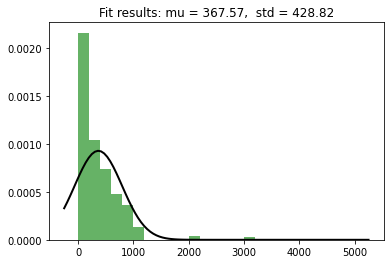

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data = df_actor_FB_likes[df_actor_FB_likes['actor_facebook_likes']<=5000].actor_facebook_likes 

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

im thinkning we could divide casaat into different types according to the oscar nomination and stuff.

In [ ]:
df_castnominated.groupby("actor_oscar_nom").count()

,actor_name
actor_oscar_nom,
1,582
2,169
3,72
4,52
5,22
6,13
7,12
8,5
9,4


In [ ]:
df_nom = pd.merge(df_actor_FB_likes, df_castnominated, how='left', on=['actor_name'])
df_nom.isnull()
df_non_nom=df_nom[df_nom.actor_oscar_nom.isnull()]
df_non_nom



,actor_name,actor_facebook_likes,actor_oscar_nom
0,CCH Pounder,1000.0,NaN
4,Doug Walker,131.0,NaN
5,Daryl Sabara,640.0,NaN
7,Brad Garrett,799.0,NaN
8,Chris Hemsworth,26000.0,NaN
...,...,...,...
6250,Sara Stepnicka,2.0,NaN
6251,Daniella Pineda,133.0,NaN
6252,Sam Underwood,319.0,NaN
6253,David Chandler,0.0,NaN


In [ ]:
df_actor_FB_likes['actor_name']

0           CCH Pounder
1           Johnny Depp
2       Christoph Waltz
3             Tom Hardy
4           Doug Walker
             ...       
6251     Sara Stepnicka
6252    Daniella Pineda
6253      Sam Underwood
6254     David Chandler
6255           Jon Gunn
Name: actor_name, Length: 6255, dtype: object

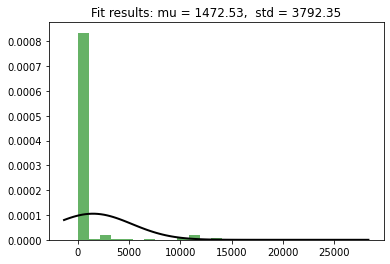

In [ ]:
df_nom1 = pd.merge(df_actor_FB_likes, df_castnominated[df_castnominated['actor_oscar_nom']==1], how='inner', on=['actor_name'])
df_nom1
data = df_nom1.actor_facebook_likes 

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

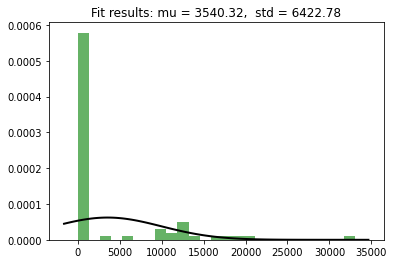

In [ ]:
df_nom2 = pd.merge(df_actor_FB_likes, df_castnominated[df_castnominated['actor_oscar_nom']==2], how='inner', on=['actor_name'])
df_nom2
data = df_nom2.actor_facebook_likes 

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

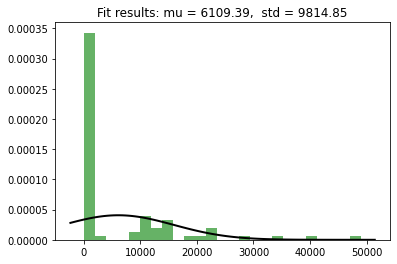

In [ ]:
df_nomrest = pd.merge(df_actor_FB_likes, df_castnominated[df_castnominated['actor_oscar_nom']>=3], how='inner', on=['actor_name'])
df_nomrest
data = df_nomrest.actor_facebook_likes 

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

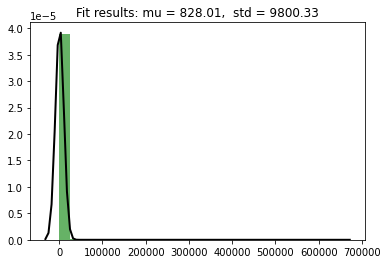

In [ ]:
df_non_nom
data = df_non_nom.actor_facebook_likes 

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
df_dir_FB_likes.director_facebook_likes.mean()

232.74395329441202

Replcae null cast Fb likes with average for below 5000 likes. replace null director fb likes with average likes 

In [ ]:

values = {'cast1_FB_likes': 367, 'cast2_FB_likes': 367,  'cast3_FB_likes': 367,'director_facebook_likes': 232}
df_rotten_tomatoes_full = df_rotten_tomatoes_full.fillna(value=values)

df_rotten_tomatoes_full

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,367.0,745.0,NaN,NaN,69.0,0.0,34337.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,593.0,270.0,303.0,NaN,NaN,NaN,232.0,NaN
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,367.0,367.0,367.0,NaN,NaN,NaN,232.0,NaN
3,The Lion King,53.0,406,88.0,76333,1994,Matthew Broderick,Jeremy Irons,James Earl Jones,Roger Allers,87,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,NaN,NaN,1.0,1.0,1.0,0.0,2000.0,367.0,367.0,NaN,NaN,NaN,28.0,6458.0
4,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,367.0,367.0,367.0,NaN,NaN,NaN,232.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,The Boy And The Beast (Bakemono No Ko),51.0,67,82.0,33491,2016,Luci Christian,Eric Vale,John Swasey,Mamoru Hosoda,119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,367.0,367.0,367.0,NaN,NaN,NaN,99.0,NaN
1290,The Other Side of the Door,92.0,37,71.0,19600,2016,Sarah Wayne Callies,Jeremy Sisto,Sofia Rosinsky,Johannes Roberts,96,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,367.0,367.0,367.0,NaN,NaN,NaN,232.0,NaN
1291,Touched With Fire,44.0,50,55.0,6208,2016,Katie Holmes,Luke Kirby,Bruce Altman,Paul Dalio,106,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,367.0,210.0,67.0,NaN,NaN,NaN,232.0,NaN
1292,The Funhouse Massacre,26.0,14,61.0,3914,2015,Chasty Ballesteros,Jere Burns,Sterling Sulieman,Andy Palmer,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,295.0,460.0,367.0,NaN,NaN,NaN,232.0,NaN


Replace null oscar nomination and wins with zeros

In [ ]:
df_rotten_tomatoes_full.replace(np.nan,0,inplace=True)
df_rotten_tomatoes_full

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,367.0,745.0,0.0,0.0,69.0,0.0,34337.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,593.0,270.0,303.0,0.0,0.0,0.0,232.0,0.0
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,0.0
3,The Lion King,53.0,406,88.0,76333,1994,Matthew Broderick,Jeremy Irons,James Earl Jones,Roger Allers,87,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,2000.0,367.0,367.0,0.0,0.0,0.0,28.0,6458.0
4,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,The Boy And The Beast (Bakemono No Ko),51.0,67,82.0,33491,2016,Luci Christian,Eric Vale,John Swasey,Mamoru Hosoda,119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,99.0,0.0
1290,The Other Side of the Door,92.0,37,71.0,19600,2016,Sarah Wayne Callies,Jeremy Sisto,Sofia Rosinsky,Johannes Roberts,96,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,367.0,367.0,367.0,0.0,0.0,0.0,232.0,0.0
1291,Touched With Fire,44.0,50,55.0,6208,2016,Katie Holmes,Luke Kirby,Bruce Altman,Paul Dalio,106,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,210.0,67.0,0.0,0.0,0.0,232.0,0.0
1292,The Funhouse Massacre,26.0,14,61.0,3914,2015,Chasty Ballesteros,Jere Burns,Sterling Sulieman,Andy Palmer,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,295.0,460.0,367.0,0.0,0.0,0.0,232.0,0.0


In [ ]:
# remove repeated rows
df_rotten_tomatoes_full = df_rotten_tomatoes_full.drop_duplicates(subset = 'Title').reset_index(drop=True)
df_rotten_tomatoes_full.shape


(1285, 42)

In [ ]:
df_rotten_tomatoes_full.describe()

,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,61.471595,82.963424,57.141634,7949.239689,2015.260700,101.314397,0.190661,0.122957,0.014786,0.199222,0.085603,0.563424,0.131518,0.044358,0.204669,0.081712,0.101167,0.006226,0.000778,0.412451,0.070817,0.164981,0.344747,0.534630,0.100389,0.335409,0.066926,0.217899,0.041245,2013.290272,1074.494163,869.687938,0.098833,0.023346,7.372763,301.125292,986.772763
std,28.706027,99.728952,20.043959,19681.891442,8.600952,15.889832,0.392976,0.328516,0.120742,0.399571,0.279886,0.496154,0.338097,0.205969,0.403617,0.274032,0.301668,0.078688,0.027896,0.492467,0.256619,0.371307,0.475471,1.533049,0.357442,1.259988,0.295665,0.782892,0.214022,5054.522224,3442.160402,3088.957012,0.620552,0.195947,29.691803,1265.208836,8814.720257
min,0.000000,5.000000,5.000000,6.000000,1915.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,13.000000,42.000000,215.000000,2016.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,367.000000,367.000000,367.000000,0.000000,0.000000,0.000000,133.000000,0.000000
50%,67.000000,36.000000,58.000000,788.000000,2017.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,367.000000,367.000000,367.000000,0.000000,0.000000,0.000000,232.000000,0.000000
75%,88.000000,122.000000,73.000000,5265.000000,2017.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,367.000000,367.000000,367.000000,0.000000,0.000000,0.000000,232.000000,0.000000
max,100.000000,501.000000,100.000000,234258.000000,2018.000000,222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,3.000000,21.000000,3.000000,7.000000,2.000000,40000.000000,49000.000000,40000.000000,12.000000,3.000000,325.000000,22000.000000,261818.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/'My Drive'

/content/drive/My Drive


In [ ]:
df_rotten_tomatoes_full.to_csv(path_or_buf='rotten_tomatoes_full_revised.csv')

In [ ]:
df_non_nom.to_csv(path_or_buf='FBLike_non_num.csv')
df_nom1.to_csv(path_or_buf='FBLike_num_noimation_1.csv')
df_nom2.to_csv(path_or_buf='FBLike_num_noimation_2.csv')
df_nomrest.to_csv(path_or_buf='FBLike_num_noimation_rest_of_people.csv')
